In [7]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import shap
from scipy.sparse import load_npz
from scipy.sparse import csr_matrix
from scipy.sparse import hstack


In [8]:
# Change these sources later!!
train_data_x_sparse = load_npz('valid_data_x_sparse.npz')
train_data_x_dense = pd.read_csv('valid_data_x_dense.csv')

train_data_x = pd.DataFrame(hstack([train_data_x_sparse, csr_matrix(train_data_x_dense.values)]).toarray())
train_data_y = np.ravel(pd.read_csv('valid_data_y.csv'))

print(train_data_x.shape)
print(train_data_y.shape)
print(train_data_y[:20])



(1679, 5017)
(1679,)
[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1]


In [9]:
# Faster linear SVM, works with a lot of data

fast_linear_svm_classifier = LinearSVC(dual="auto")

fast_linear_svm_classifier.fit(train_data_x, train_data_y)

train_data_y_pred = fast_linear_svm_classifier.predict(train_data_x)
train_f1_score = f1_score(train_data_y, train_data_y_pred)
print("F1 score on training data:", train_f1_score)


F1 score on training data: 0.9879336349924586


In [10]:
# Linear SVM
# Will need to use smaller dataset!!

linear_svm_classifier = SVC(kernel='linear')

linear_svm_classifier.fit(train_data_x, train_data_y)

train_data_y_pred = linear_svm_classifier.predict(train_data_x)
train_f1_score = f1_score(train_data_y, train_data_y_pred)
print("F1 score on training data:", train_f1_score)

F1 score on training data: 0.9197336137399229


In [11]:
# Polynimial SVM
# Will need to use smaller dataset!!

polynomial_svm_classifier = SVC(kernel='poly', degree=3)

polynomial_svm_classifier.fit(train_data_x, train_data_y)

train_data_y_pred = polynomial_svm_classifier.predict(train_data_x)
train_f1_score = f1_score(train_data_y, train_data_y_pred)
print("F1 score on training data:", train_f1_score)

F1 score on training data: 0.882610158089472


In [12]:
# Radial Basis Function SVM
# Will need to use smaller dataset!!

rbf_svm_classifier = SVC(kernel='rbf')

rbf_svm_classifier.fit(train_data_x, train_data_y)

train_data_y_pred = rbf_svm_classifier.predict(train_data_x)
train_f1_score = f1_score(train_data_y, train_data_y_pred)
print("F1 score on training data:", train_f1_score)

F1 score on training data: 0.8778855804616928


In [13]:
# Sigmoid SVM
# Will need to use smaller dataset!!

sigmoid_svm_classifier = SVC(kernel='sigmoid')

sigmoid_svm_classifier.fit(train_data_x, train_data_y)

train_data_y_pred = sigmoid_svm_classifier.predict(train_data_x)
train_f1_score = f1_score(train_data_y, train_data_y_pred)
print("F1 score on training data:", train_f1_score)

F1 score on training data: 0.8772985623537278


In [19]:
# Samples used for calculating SHAP values

shap_samples = shap.sample(train_data_x, 10) # Should be increased later!! 

100%|██████████| 10/10 [00:31<00:00,  3.17s/it]


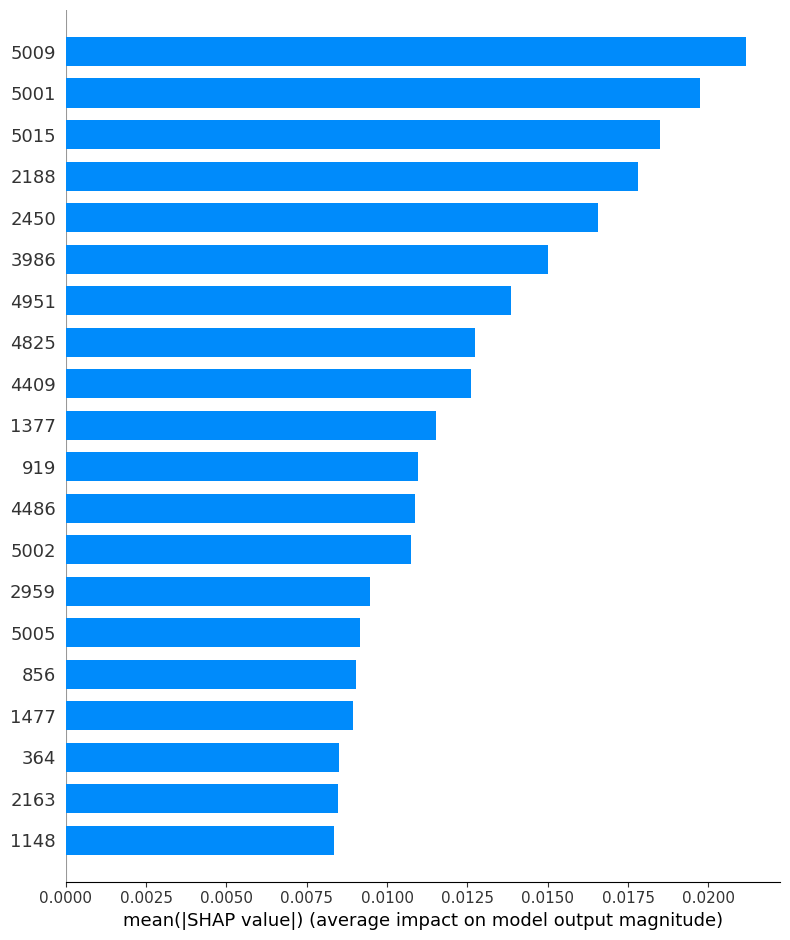

In [20]:
# SHAP explenations for fast linear SVM

fast_linear_svm_explainer = shap.KernelExplainer(fast_linear_svm_classifier.predict,  shap_samples)

shap_values = fast_linear_svm_explainer.shap_values(shap_samples, num_workers=8)

shap.summary_plot(shap_values, features=train_data_x, plot_type='bar')

100%|██████████| 10/10 [15:25<00:00, 92.51s/it]


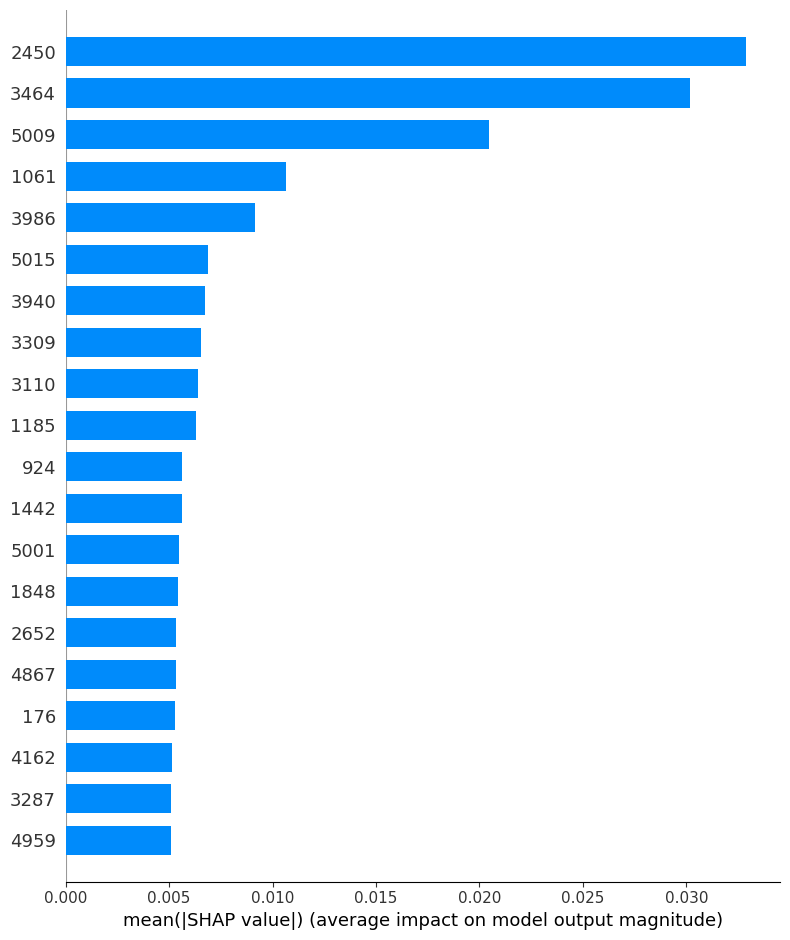

In [26]:
# SHAP explenations for linear SVM

linear_svm_explainer = shap.KernelExplainer(linear_svm_classifier.predict, shap_samples)

shap_values = linear_svm_explainer.shap_values(shap_samples, num_workers=8)

shap.summary_plot(shap_values, features=train_data_x, plot_type='bar')

In [ ]:
# SHAP explenations for polynomial SVM

polynomial_svm_explainer = shap.KernelExplainer(polynomial_svm_classifier.predict, shap_samples)

shap_values = polynomial_svm_explainer.shap_values(shap_samples, num_workers=8)

shap.summary_plot(shap_values, features=train_data_x, plot_type='bar')

In [ ]:
# SHAP explenations for rbf SVM

rbf_svm_explainer = shap.KernelExplainer(rbf_svm_classifier.predict, shap_samples)

shap_values = rbf_svm_explainer.shap_values(shap_samples, num_workers=8)

shap.summary_plot(shap_values, features=train_data_x, plot_type='bar')

In [ ]:
# SHAP explenations for sigmoid SVM

sigmoid_svm_explainer = shap.KernelExplainer(sigmoid_svm_classifier.predict, shap_samples)

shap_values = sigmoid_svm_explainer.shap_values(shap_samples, num_workers=8)

shap.summary_plot(shap_values, features=train_data_x, plot_type='bar')